In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('jedinstveni.csv')
df.drop(columns=['Broj sedišta'], inplace=True)
df.drop(columns=['Boja enterijera'], inplace=True)
df = df.drop('Strana volana', axis=1)
df = df.drop('Stanje', axis=1)

In [2]:
"""Iz skupa su izbačene kolone kao što su broj sjedišta, strana vilana i stanje. jer strana volana je uvijek lijeva, stanje je uvijek polovno a 
broj sjedišta je 5."""

'Iz skupa su izbačene kolone kao što su broj sjedišta, strana vilana i stanje. jer strana volana je uvijek lijeva, stanje je uvijek polovno a \nbroj sjedišta je 5.'

In [3]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni, bar chart da plotujemo za kolone koje imaju 0
#markdown celije: uredni
# df.isnull().sum()

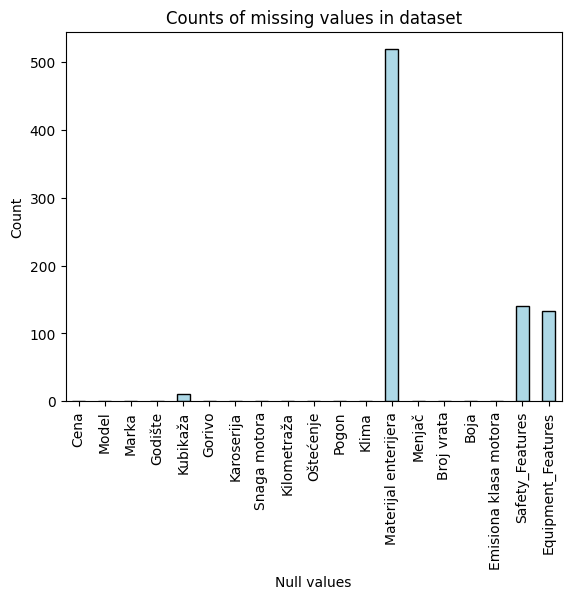

In [4]:
#vizualizacija nedostajucih vrednosti po kolonama. -----barchart bi znacio. ako su redudantne vizualizacije. u sto manje vremena
#da ga prodjemo u roku od 5 minuta i da je sve jasno sta se desava
import seaborn as seab
# seab.heatmap(df.isnull(),cbar=False,cmap='viridis')

df.isnull().sum().plot(kind='bar', color='lightblue', edgecolor='black') #da logaritmujemo count kad imamo nesrazmijerne grafike
plt.title('Counts of missing values in dataset')
plt.xlabel('Null values')
plt.ylabel('Count')
plt.show()

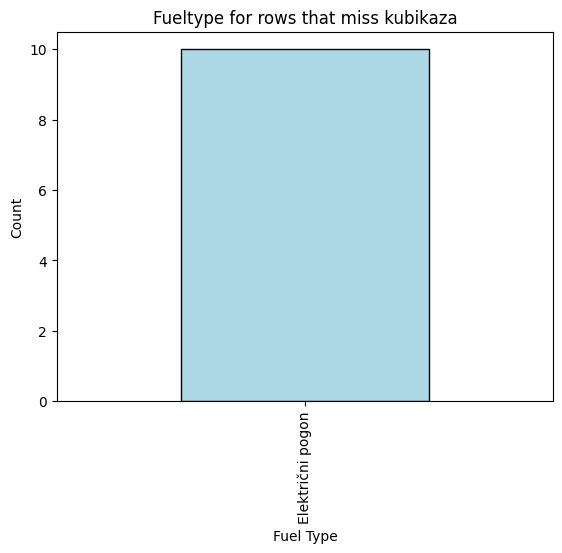

In [5]:
"""OVO STAVITI U EDA NOTEBOOK"""
missing_rows = df[df['Kubikaža'].isnull()]
missing_rows['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black') 
plt.title('Fueltype for rows that miss kubikaza')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

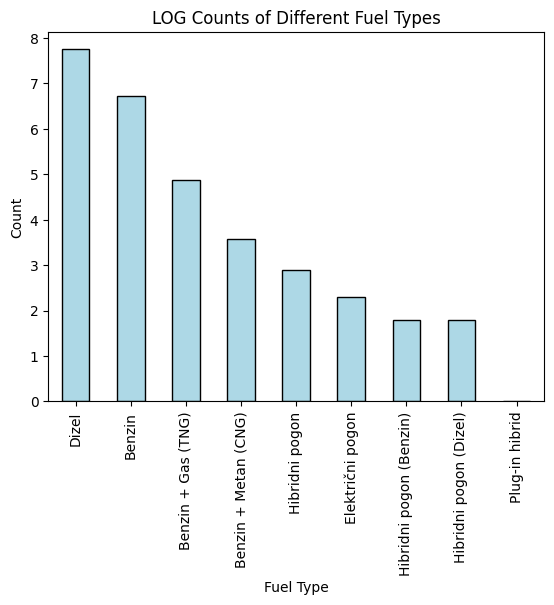

In [6]:

df['Gorivo'].value_counts()
np.log(df['Gorivo'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black') 
plt.title('LOG Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [7]:
#Zakljucujemo da ne zelimo da radimo sa elektricnim i hibridnim vozililma jer ih ima ukupno 41 (premalo)
#Benzin u kombiniciji sa TNG i CNG cemo spojiti u jednu kategoriju -- ovo u markdown celiju
def categorize_fuel(value):
    if value == 'Dizel':
        return 'Dizel'
    elif value == 'Benzin':
        return 'Benzin'
    elif value in ['Benzin + Gas (TNG)', 'Benzin + Metan (CNG)']:
        return 'Gas'
    else:
        return 'Other'

df['Gorivo'] = df['Gorivo'].apply(categorize_fuel)

df = df[df['Gorivo'] != 'Other']

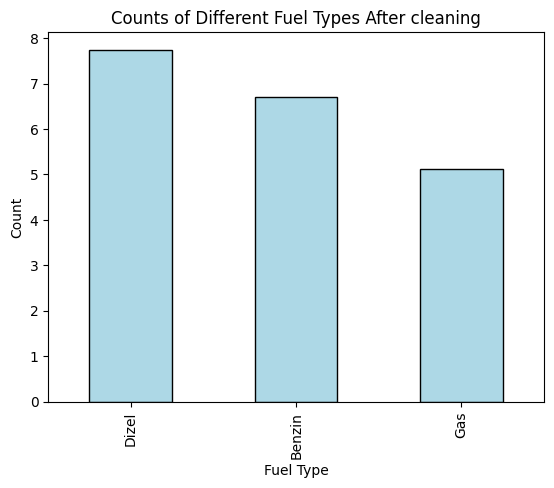

In [8]:
#Prema tipu goriva skup nije balansiran
# print(df['Gorivo'].value_counts())
np.log(df['Gorivo'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types After cleaning')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [9]:
# iz safety features i equipment smo pretrazivali samo koliko imaju iz skupa izabranih
# a ako uopste nema vrednosti nikakve onda stavljamo missing kao broj  --- ostaviti kao jednu od opcija. ---da probamo i da napravimo nove kolone
valid_safety_features = ["Airbag", "Child lock", "ABS", "Blokada motora", "Ulazak bez ključa"]
def count_valid_safety_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_safety_features))
    return 'missing'
df['Safety_Feature_Count'] = df['Safety_Features'].apply(count_valid_safety_features)
valid_equipment_features = ["Sportska sedišta", "Tempomat", "Senzori za kišu", "Parking senzori", "Aluminijumske felne", "Multimedija"]
def count_valid_equipment_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_equipment_features))
    return 'missing'
df['Equipment_Feature_Count'] = df['Equipment_Features'].apply(count_valid_equipment_features)

df = df.drop('Safety_Features', axis=1)
df = df.drop('Equipment_Features', axis=1)

# print(df[['Safety_Feature_Count', 'Equipment_Feature_Count']])

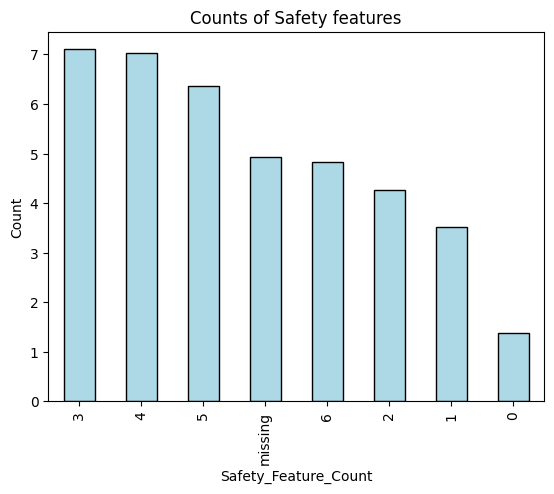

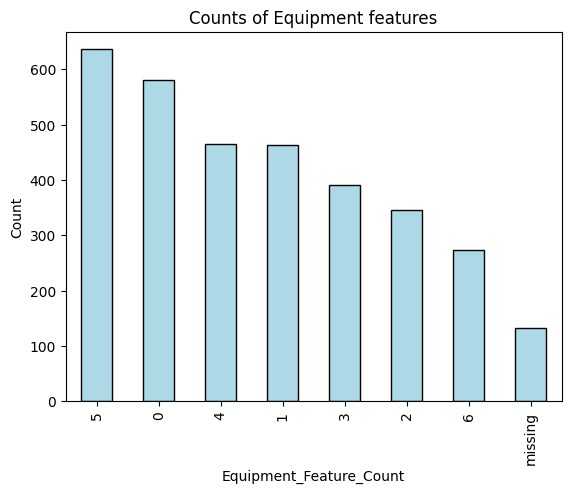

In [10]:
#Nedostajuce vrednosti cemo interpolirati zato sto se radi o nebalansiranom skupu slicnom normalnoj raspodeli
np.log(df['Safety_Feature_Count'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [11]:

# import scipy as sc
df['Safety_Feature_Count'] = pd.to_numeric(df['Safety_Feature_Count'], errors='coerce')

# polinomialna interpolacija
df['Safety_Feature_Count'] = df['Safety_Feature_Count'].interpolate(method='polynomial', order=2).round().clip(upper=6)

# print(df['Safety_Feature_Count'].value_counts())


In [12]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Equipment_Feature_Count'] = pd.to_numeric(df['Equipment_Feature_Count'], errors='coerce')

# Calculate the median of 'Equipment_Feature_Count' excluding 'NaN' values
median_value = df['Equipment_Feature_Count'].median()

# Replace 'NaN' (which represents 'missing') with the calculated median
df['Equipment_Feature_Count'] = df['Equipment_Feature_Count'].fillna(median_value)

# print(df['Equipment_Feature_Count'].value_counts())

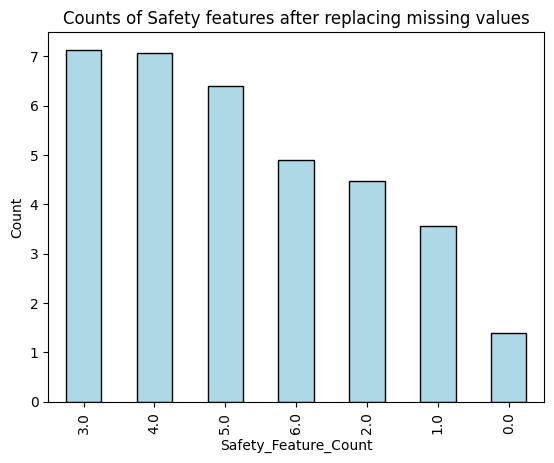

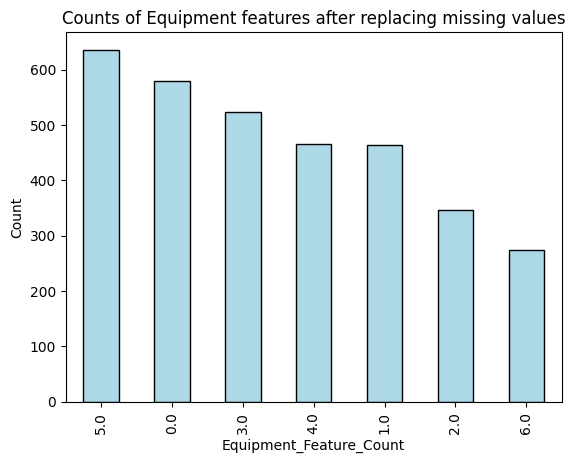

In [13]:
np.log(df['Safety_Feature_Count'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features after replacing missing values')
plt.ylabel('Count')
plt.show()

#Ovde je situacija bila relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features after replacing missing values')
plt.ylabel('Count')
plt.show()

In [14]:
#Posto nedostajucih vrednosti ima oko 500,600 mozemo iskoristiti dodavanje nove kategorije 'nepoznato' za njih
df['Materijal enterijera'] = df['Materijal enterijera'].fillna('Nepoznato')
# print(df['Materijal enterijera'].value_counts())

In [15]:
def clean_currency(value):
    return float(value.replace('€', '').replace('.', '').strip())
def clean_mileage(value):
    return float(value.replace('km', '').replace('.', '').strip())
def clean_engine_volume(value):
    if "cm3" in value:
        return float(value.replace('cm3', '').replace('.', '').strip())
    return value 
def extract_kw(value):
    return float(value.split('/')[0].strip())

df['Cena'] = df['Cena'].apply(clean_currency)
df['Kilometraža'] = df['Kilometraža'].apply(clean_mileage)
df['Snaga motora'] = df['Snaga motora'].apply(extract_kw)
df['Kubikaža'] = df['Kubikaža'].apply(clean_engine_volume)
# print(df)

In [16]:
# izbacivanje duplikata nakon ciscenja podataka (ukoliko se neki sakrio)
df = df.drop_duplicates()

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [18]:
# u eda notebook

# prices = df[['Cena']].values

# # Step 3: Normalize or scale the data (optional, depending on the range of prices)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# prices_scaled = scaler.fit_transform(prices)

# # Step 4: Apply DBSCAN
# # Adjust eps (radius) and min_samples (minimum points in a cluster) based on your data
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# labels = dbscan.fit_predict(prices_scaled)

# # Step 5: Add DBSCAN labels to the dataframe
# df['Cluster'] = labels

# # Outliers are labeled as -1 by DBSCAN
# outliers = df[df['Cluster'] == -1]

# # Step 6: Visualize the results
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x=range(len(df)), y='Cena', hue='Cluster', palette='viridis')
# plt.title('DBSCAN Clustering and Outlier Detection')
# plt.xlabel('Index')
# plt.ylabel('Property Price')
# plt.legend(title='Cluster')
# plt.show()
# #research question: celija koda pa ima plot i posle plota u jednoj recenici zakljucak.
# outliers

In [19]:
# nakon detektovanja outlier-a izbacicemo ih iz skupa
# df = df[df['Cluster'] != -1].drop(columns=['Cluster'])

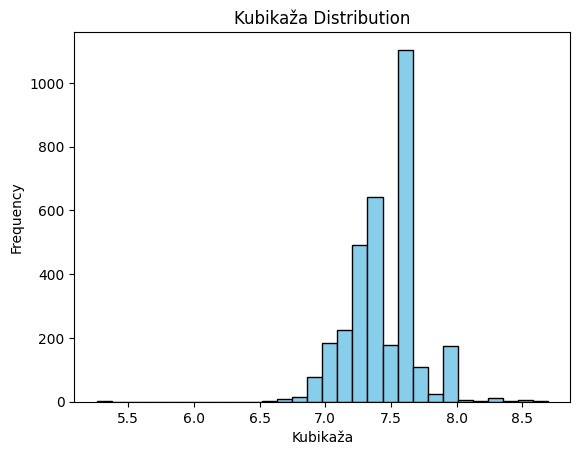

In [20]:
# treba malo pogledati raspodele stvari koje normalizujemo
import matplotlib.pyplot as plt
plt.hist(np.log(df['Kubikaža']), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Kubikaža')
plt.ylabel('Frequency')
plt.title('Kubikaža Distribution')
plt.show()

# normalizacija velikih kontinualnih vrednosti pomocu standard scaler-a
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# df['Kubikaža'] = scaler.fit_transform(df[['Kubikaža']])
# df['Kilometraža'] = scaler.fit_transform(df[['Kilometraža']])
# df['Snaga motora'] = scaler.fit_transform(df[['Snaga motora']])


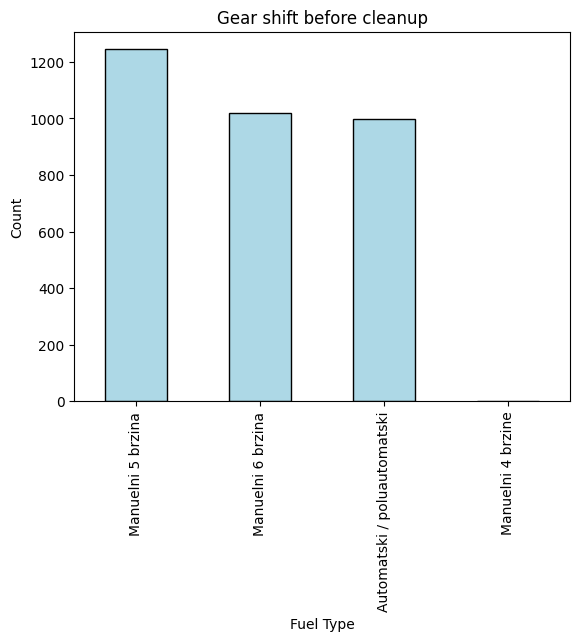

In [21]:
# proveravamo vrednosti za enkodiranje one hotom
df['Menjač'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black') #da logaritmujemo count kad imamo nesrazmijerne grafike
plt.title('Gear shift before cleanup')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [22]:
# spajamo sve manuelne u jednu kategoriju
def categorize_gear_shift(value):
    if value == 'Automatski / poluautomatski':
        return 'Automatski'
    elif value in ['Manuelni 5 brzina', 'Manuelni 6 brzina', 'Manuelni 4 brzine']:
        return 'Manuelni'
    else:
        return 'Other'

df['Menjač'] = df['Menjač'].apply(categorize_gear_shift)


In [23]:
# radimo one hot encoding, stvori se nova kolona koja samo ima true false
df = pd.get_dummies(df, columns=['Menjač'], drop_first=True)
df['Menjač_Manuelni'] = df['Menjač_Manuelni'].astype(int)

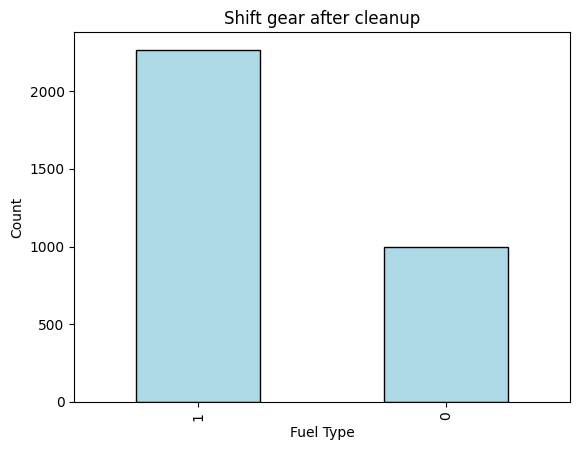

In [24]:
df['Menjač_Manuelni'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black') #da logaritmujemo count kad imamo nesrazmijerne grafike
plt.title('Shift gear after cleanup')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [25]:
df['Pogon'].value_counts()

Pogon
Prednji         2383
4x4              508
Zadnji           312
4x4 reduktor      61
Name: count, dtype: int64

In [26]:
def categorize_pogon(value):
    if value == 'Prednji':
        return 'Prednji'
    elif value == 'Zadnji':
        return 'Zadnji'
    elif value in ['4x4', '4x4 reduktor']:
        return '4x4'
    else:
        return 'Other'

df['Pogon'] = df['Pogon'].apply(categorize_pogon)

In [27]:
df['Karoserija'].value_counts()


Karoserija
Hečbek      1353
Limuzina     698
Džip/SUV     569
Karavan      527
Kupe         117
Name: count, dtype: int64

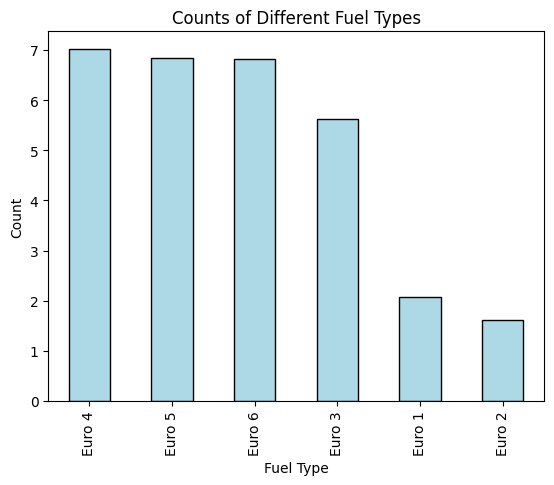

In [28]:
np.log(df['Emisiona klasa motora'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black') #da logaritmujemo count kad imamo nesrazmijerne grafike
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

#Izbacujemo Euro1 i Euro 2 automobile
df = df[df['Emisiona klasa motora'] != 'Euro 1']
df = df[df['Emisiona klasa motora'] != 'Euro 2']

In [29]:
# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Pogon'] = label_encoder.fit_transform(df['Pogon'])
df['Karoserija'] = label_encoder.fit_transform(df['Karoserija'])
df['Emisiona klasa motora'] = label_encoder.fit_transform(df['Emisiona klasa motora'])
df['Gorivo'] = label_encoder.fit_transform(df['Gorivo'])


In [30]:
df

,Cena,Model,Marka,Godište,Kubikaža,Gorivo,Karoserija,Snaga motora,Kilometraža,Oštećenje,Pogon,Klima,Materijal enterijera,Broj vrata,Boja,Emisiona klasa motora,Safety_Feature_Count,Equipment_Feature_Count,Menjač_Manuelni
0,3200.0,Astra H,Opel,2006.0,1686.0,1,1,74.0,299850.0,Nije oštećen,1,Automatska klima,Nepoznato,4/5 vrata,Plava,1,4.0,2.0,1
1,9500.0,A3,Audi,2013.0,1598.0,1,1,77.0,212000.0,Nije oštećen,1,Manuelna klima,Štof,4/5 vrata,Crna,2,4.0,4.0,1
2,4000.0,Octavia,Škoda,2008.0,1896.0,1,4,77.0,285500.0,Nije oštećen,1,Automatska klima,Štof,4/5 vrata,Crna,1,4.0,1.0,1
3,3300.0,A 180,Mercedes Benz,2008.0,1991.0,1,1,80.0,208000.0,Nije oštećen,1,Manuelna klima,Kombinovana koža,4/5 vrata,Plava,1,4.0,3.0,1
4,3550.0,Corsa D,Opel,2009.0,1229.0,2,1,59.0,265025.0,Nije oštećen,1,Manuelna klima,Štof,4/5 vrata,Crna,1,4.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,34990.0,730,BMW,2016.0,2993.0,1,4,195.0,153958.0,Nije oštećen,0,Automatska klima,Prirodna koža,4/5 vrata,Crna,3,3.0,5.0,0
3324,17500.0,A4,Audi,2016.0,1968.0,1,4,110.0,225987.0,Nije oštećen,1,Automatska klima,Štof,4/5 vrata,Crna,2,4.0,5.0,0
3325,10500.0,Golf 7,Volkswagen,2017.0,1598.0,1,1,66.0,236000.0,Nije oštećen,1,Manuelna klima,Štof,4/5 vrata,Bela,3,3.0,5.0,1
3326,13500.0,Superb,Škoda,2017.0,2000.0,1,4,110.0,142000.0,Nije oštećen,1,Manuelna klima,Štof,4/5 vrata,Crna,2,3.0,3.0,1


In [31]:
df['Materijal enterijera'].value_counts()

Materijal enterijera
Štof                1753
Nepoznato            512
Prirodna koža        503
Kombinovana koža     397
Drugi                 49
Velur                 37
Name: count, dtype: int64

In [32]:
# EDA
print(df.head())

     Cena    Model          Marka  Godište  Kubikaža  Gorivo  Karoserija  \
0  3200.0  Astra H           Opel   2006.0    1686.0       1           1   
1  9500.0       A3           Audi   2013.0    1598.0       1           1   
2  4000.0  Octavia          Škoda   2008.0    1896.0       1           4   
3  3300.0    A 180  Mercedes Benz   2008.0    1991.0       1           1   
4  3550.0  Corsa D           Opel   2009.0    1229.0       2           1   

   Snaga motora  Kilometraža     Oštećenje  Pogon             Klima  \
0          74.0     299850.0  Nije oštećen      1  Automatska klima   
1          77.0     212000.0  Nije oštećen      1    Manuelna klima   
2          77.0     285500.0  Nije oštećen      1  Automatska klima   
3          80.0     208000.0  Nije oštećen      1    Manuelna klima   
4          59.0     265025.0  Nije oštećen      1    Manuelna klima   

  Materijal enterijera Broj vrata   Boja  Emisiona klasa motora  \
0            Nepoznato  4/5 vrata  Plava         

In [33]:
# da vidimo da li uopste ima kakav uticaj na cenu pa ako ima onda mozemo enkodirati one hot-om ako ne onda izbacimo
# da bismo olaksali analizu zavisnosti između obeležja, sva nenumericka obeležja će biti pretvorena u numerička
#print(df.head()) # obeležja koja treba pretvoriti su model, marka, ostecenje, klima, materijal enterijera, broj vrata
#broj vrata
df['Broj vrata'].value_counts() # dosta nebalansiran skup
df['Cetiri_Vrata'] = (df['Broj vrata'] == '4/5 vrata').astype(int)
df['Cetiri_Vrata'].value_counts()
df = df.drop('Broj vrata', axis=1)

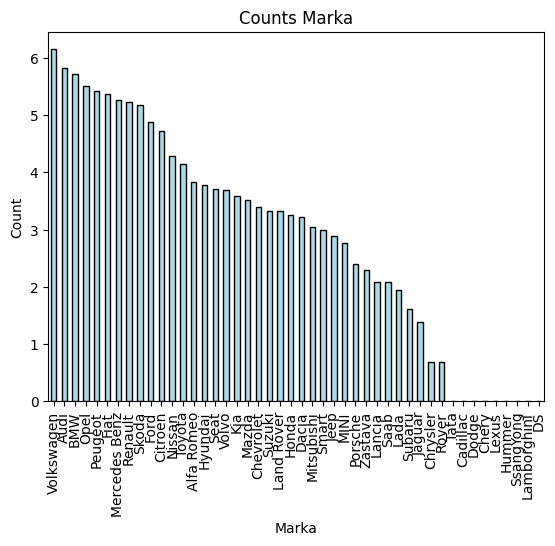

In [34]:

df['Model'].value_counts() # 387 modela automobila ------ previše svakako, ovu kolonu izbacujemo -- ako ne treba mozemo je enkodovati i kao sljedecu metodu
# df = df.drop('Model', axis=1)
df['Marka'].value_counts() # 47 marki automobila.
np.log(df['Marka'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts Marka')
plt.ylabel('Count')
plt.show()

#veliki broj klasa, koristićemo frequent encoding ---- bas zato sto je nebalansiran skup, mijenja se kategorija sa brojem pojavljivanja u skupu
# frequency_map = df['Marka'].value_counts(normalize=True)
# df['Marka'] = df['Marka'].map(frequency_map)


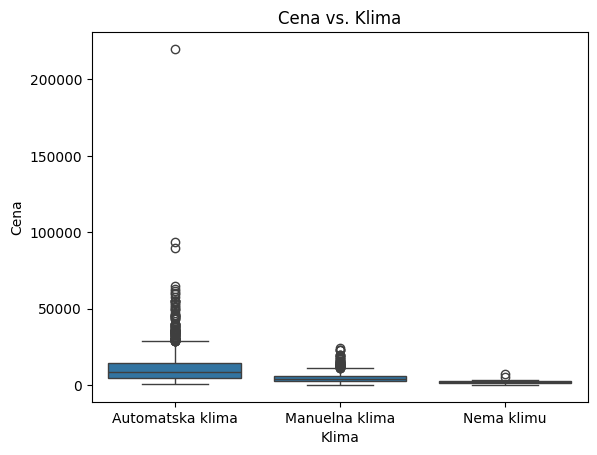

In [35]:
# izbacicemo ove sto nemaju najveovatnije a onda one hot encoding
df['Klima'].value_counts()
sns.boxplot(x='Klima', y='Cena', data=df)
plt.title('Cena vs. Klima')
plt.show()
# na osnovu plota vidim da imamo dosta autlajera


In [36]:
df['Klima'].value_counts()

Klima
Automatska klima    2149
Manuelna klima      1044
Nema klimu            58
Name: count, dtype: int64

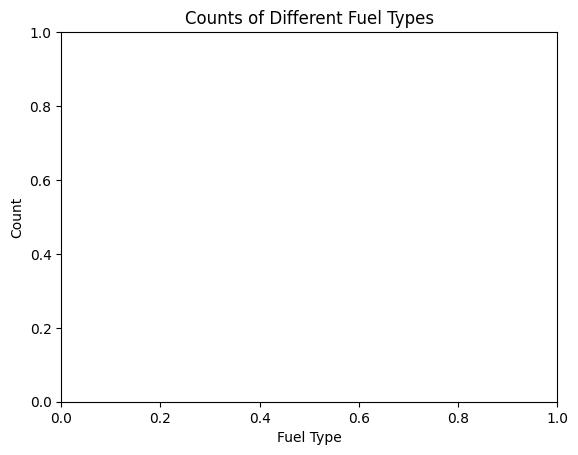

In [37]:
# df = df[df['Klima'] != "Nema klimu"] #TODO: provjeriti da li izbaciti ovo
# #one hot encoding
# #df = pd.get_dummies(df, columns=['Klima'], drop_first=True)
# df['Klima'].value_counts()
# # one hot encoding 
# df['Automatska_Klima'] = (df['Klima'] == 'Automatska klima').astype(int)
# df = df.drop('Klima', axis = 1)
# df['Automatska_Klima'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black') 
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [38]:
# jako nebalansirano, ostecenje utice na cenu, izbacicemo ostecena auta!
df['Oštećenje'].value_counts()

#provera kako ostecenje utice na cenu -- korisitmo tzv analizu varianse (Analysis of variance) tj. koliko srednja vrednost cene se menja kroy kategorije

# from scipy.stats import f_oneway
# #rucno je da znamo na koje se klase odnosi
# groups = [df['Cena'][df['Oštećenje'] == cat] for cat in df['Oštećenje'].unique()]
# f_stat, p_val = f_oneway(*groups)

# print(f'F-statistic: {f_stat}, p-value: {p_val}')


Oštećenje
Nije oštećen                      3184
Oštećen - u voznom stanju           43
Oštećen - nije u voznom stanju      24
Name: count, dtype: int64

In [39]:
# """
# Ovo prebaciti u eda notebook kako ostecenje utice na cenu
# """
# sns.boxplot(x='Oštećenje', y='Cena', data=df)
# plt.yscale('log')
# plt.title('Cena vs. Oštećenje')
# plt.show()
# #ako brkovi nisu isti onda su podaci nakrivljeni i ako medijana nije centrirana ----
# #ako se jasno boksovi razdvajaju ---- onda ima smisla, ako su svi iste velicine onda su vjv slicni i moze da se izbaci.
# #treba da gledamo kako potencijalno autlajeri mogu biti problematicni.
# #probamo model i vidimo kakvi su rezultati i gdje ima gresaka
# #koje instance podataka kvare podatke.
#

In [40]:
# # plotovi stecenih su mnogo manji u odnosu na  one koji nije ostecen. Takodje, vidimo da imamo dosta autlajera u neostecenim.
# # vidimo da ostecene mozemo izbaciti -- previse su velike oscilacije u ceni. mnogo uticu na cenu.
# #izbacujemo automobile koji su osteceni i uklonicemo ovo polje jer ce biti identicno za svaki podatak
# df = df[df['Oštećenje'] == 'Nije oštećen']
# #df['Oštećenje'].value_counts()
# df = df.drop('Oštećenje', axis=1)

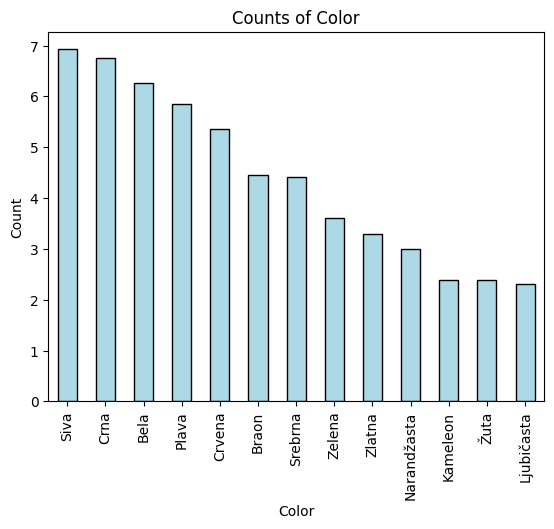

In [41]:

# Bež, krem i smeđu ćemo spojiti sa braon. bordo spajamo sa crvenom. Tirkiz i teget se spaja sa plavom.
df['Boja'] = df['Boja'].replace('Bordo', 'Crvena')
df['Boja'] = df['Boja'].replace('Tirkiz', 'Plava')
df['Boja'] = df['Boja'].replace('Teget', 'Plava')
df['Boja'] = df['Boja'].replace('Krem', 'Braon')
df['Boja'] = df['Boja'].replace('Bež', 'Braon')
df['Boja'] = df['Boja'].replace('Smeđa', 'Braon')
np.log(df['Boja'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black') 
plt.title('Counts of Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

In [42]:
"""
TODO: vidjeti da li ovo da izbacimo ove boje ili ne
razlog izbacivanja neceg je povecanje tacnosti --- probati sa i bez. ---- najbolje probati pa vidjeti.
"""
# removing_colors = ['Žuta','Ljubičasta','Kameleon'] #vidjeti da li da izbacimo ove boje
# mask = ~df['Boja'].isin(removing_colors)
# df = df[mask]
# df['Boja'].value_counts()
# print(df.shape[0])

# # label encoding. Zbog borja klasa razmisliti o feature encodingu
# df['Boja'] = label_encoder.fit_transform(df['Boja'])


'\nTODO: vidjeti da li ovo da izbacimo ove boje ili ne\nrazlog izbacivanja neceg je povecanje tacnosti --- probati sa i bez. ---- najbolje probati pa vidjeti.\n'

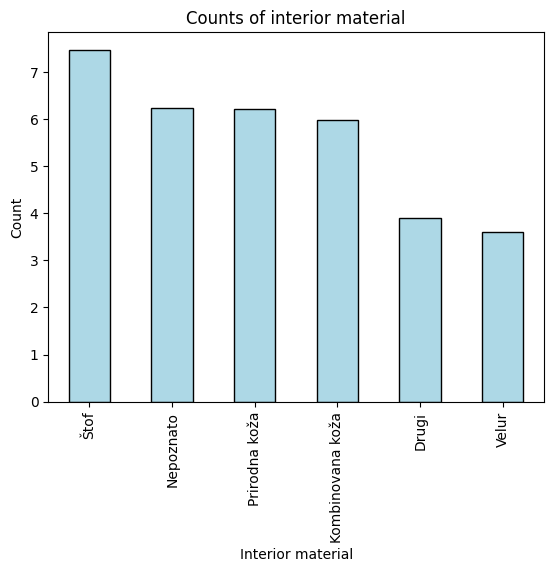

In [43]:
np.log(df['Materijal enterijera'].value_counts()).plot(kind='bar', color='lightblue', edgecolor='black') #da logaritmujemo count kad imamo nesrazmijerne grafike
plt.title('Counts of interior material')
plt.xlabel('Interior material')
plt.ylabel('Count')
plt.show() #necemo izbacivati
# removing_materials = ['Drugi','Velur']
# mask1 = ~df['Materijal enterijera'].isin(removing_materials)
# df = df[mask1]


In [44]:
# label encoding. Zbog borja klasa razmisliti o feature encodingu
df['Materijal enterijera'] = label_encoder.fit_transform(df['Materijal enterijera'])
print(df)

         Cena              Model          Marka  Godište  Kubikaža  Gorivo  \
0      3200.0            Astra H           Opel   2006.0    1686.0       1   
1      9500.0                 A3           Audi   2013.0    1598.0       1   
2      4000.0            Octavia          Škoda   2008.0    1896.0       1   
3      3300.0              A 180  Mercedes Benz   2008.0    1991.0       1   
4      3550.0            Corsa D           Opel   2009.0    1229.0       2   
...       ...                ...            ...      ...       ...     ...   
3323  34990.0                730            BMW   2016.0    2993.0       1   
3324  17500.0                 A4           Audi   2016.0    1968.0       1   
3325  10500.0             Golf 7     Volkswagen   2017.0    1598.0       1   
3326  13500.0             Superb          Škoda   2017.0    2000.0       1   
3327  29200.0  Range Rover Velar     Land Rover   2017.0    1999.0       1   

      Karoserija  Snaga motora  Kilometraža     Oštećenje  Pogo

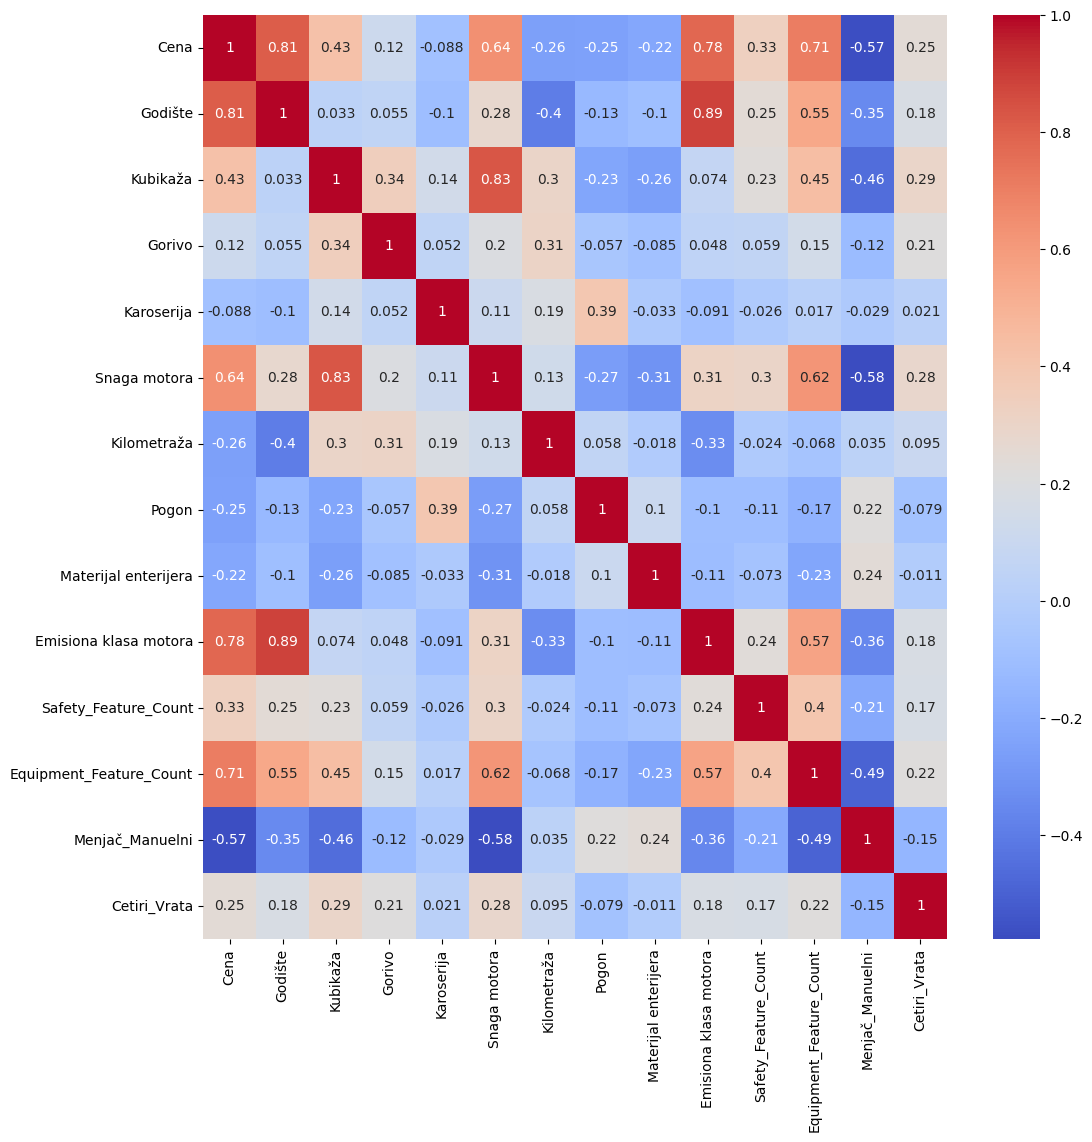

In [45]:
# racunanje korelacione matrice, ----- gledamo samo linearnu zavisnost ovdje
#zasto spearman a ne default pearson? -- jer je nas dataset poprilicno nebalansiran

correlation_matrix = df.corr(method = 'spearman',numeric_only=True)
# print(correlation_matrix)

# vizualiyacija pomocu heatmap-e
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [46]:
# Na osnovu heatmap-e , može se zaključiti sljedeće 
#1,00 predstavlja perfektnu pozitivnu koleraciju.
#Godište i emisiona klasa motora imaju 0,89 zavisnost
#Takođe Kubikaža i snaga motora imaju korelaciju 0,81.
#karoserija ima jako mali koeficijent korelacije.

#postavljaćemo pitanja u EDI koja su vezana za ovo


In [47]:
# df = df.drop('Karoserija', axis = 1)
# df = df.drop('Emisiona klasa motora', axis=1)
# df = df.drop('Snaga motora', axis=1)

In [48]:
print(df.shape)

(3251, 19)


In [49]:
# df['Godište'] = scaler.fit_transform(df[['Godište']]) # previse smo stvari izbacili.
# imamo minimalno eksplorativne analize. cena po marki automobila. kako se ponasa cena spram kubikaze. pearsonovu korelaciju i da plotujemo.
#eksplorativna analiza za cijene telefona kao primjer. koja su to zanimljiva pitanja koja treba postaviti.
#da notebook prolazi kroz desetak research pitanja. Neka su bila povezana za ciscenje podataka.
# maks 5 minuta da se moze ispricati. zaposleni primjer na kanvasu.